# 主題：Dijkstra 與Kruskal流程圖與原理說明
# 大綱：
# 1.Dijkstra 原理 2.Dijkstra流程圖 3.Dijkstra程式碼
# 1.Kruskal 原理 2.Kruskal 流程圖 3.Kruskal程式碼

# Dijkstra 學習歷程

# Dijkstra 原理
  建立兩個list：
  先建立一個self.distance的list，是用來紀錄起始點到各點的最短距離，再來，建立一個self.visited，是用來紀錄走訪過頂點，
  當self.visited長度不等於頂點個數的時候：（不斷執行下面行動）
  
  對起始點：
  一、將起始點加入到self.visited序列中，再將該起始點連接的頂點權重存入到self.distance序列裡面
  
  二、再對self.distance裡面元素，挑選出最短權重，該index（頂點）做為下一個走訪點，
  
  對其他頂點：
  
  一、將該下一個頂點加入到self.visited序列中，這邊將此頂點連接的頂點權重加入到self.distance的時候，特別注意，要經過比較，
  
  分成下列類型：
  
  ＃該點不在已經拜訪list當中：
  
  1.該點原本沒有被前面走訪點連接到，但現在此點有通過該點，則將起始點到現在正在走訪的點連接到該點權重相加總和當做此點的新權重。
  
  2.該點原本已被走訪到，且現在正在走訪此點到該點的距離相比起始點到該點距離更短，則將更短的距離當作原本距離。
  
  3.該點原本已被走訪到，但此點到該點的距離沒有比他原本距離更短，則延用原本的距離。
  
  4.該點原本沒有被走訪，且下一個點也沒有走訪到他，則該點也維持原距離。
  
  ＃該點已在拜訪list當中：
  
  1.該點距離維持原本距離，因為此距離已經是起始點到該點的最短路徑
  
  二、每次更換self.distance結束就進行挑選最短權重
  
  已經再self.distance的頂點的權重不列入比較，對剩下頂點權重選取最短權重，結束後再持續執行第一點，直到所有頂點走訪結束。
  
  
  
  
  

# Dijkstra 流程圖

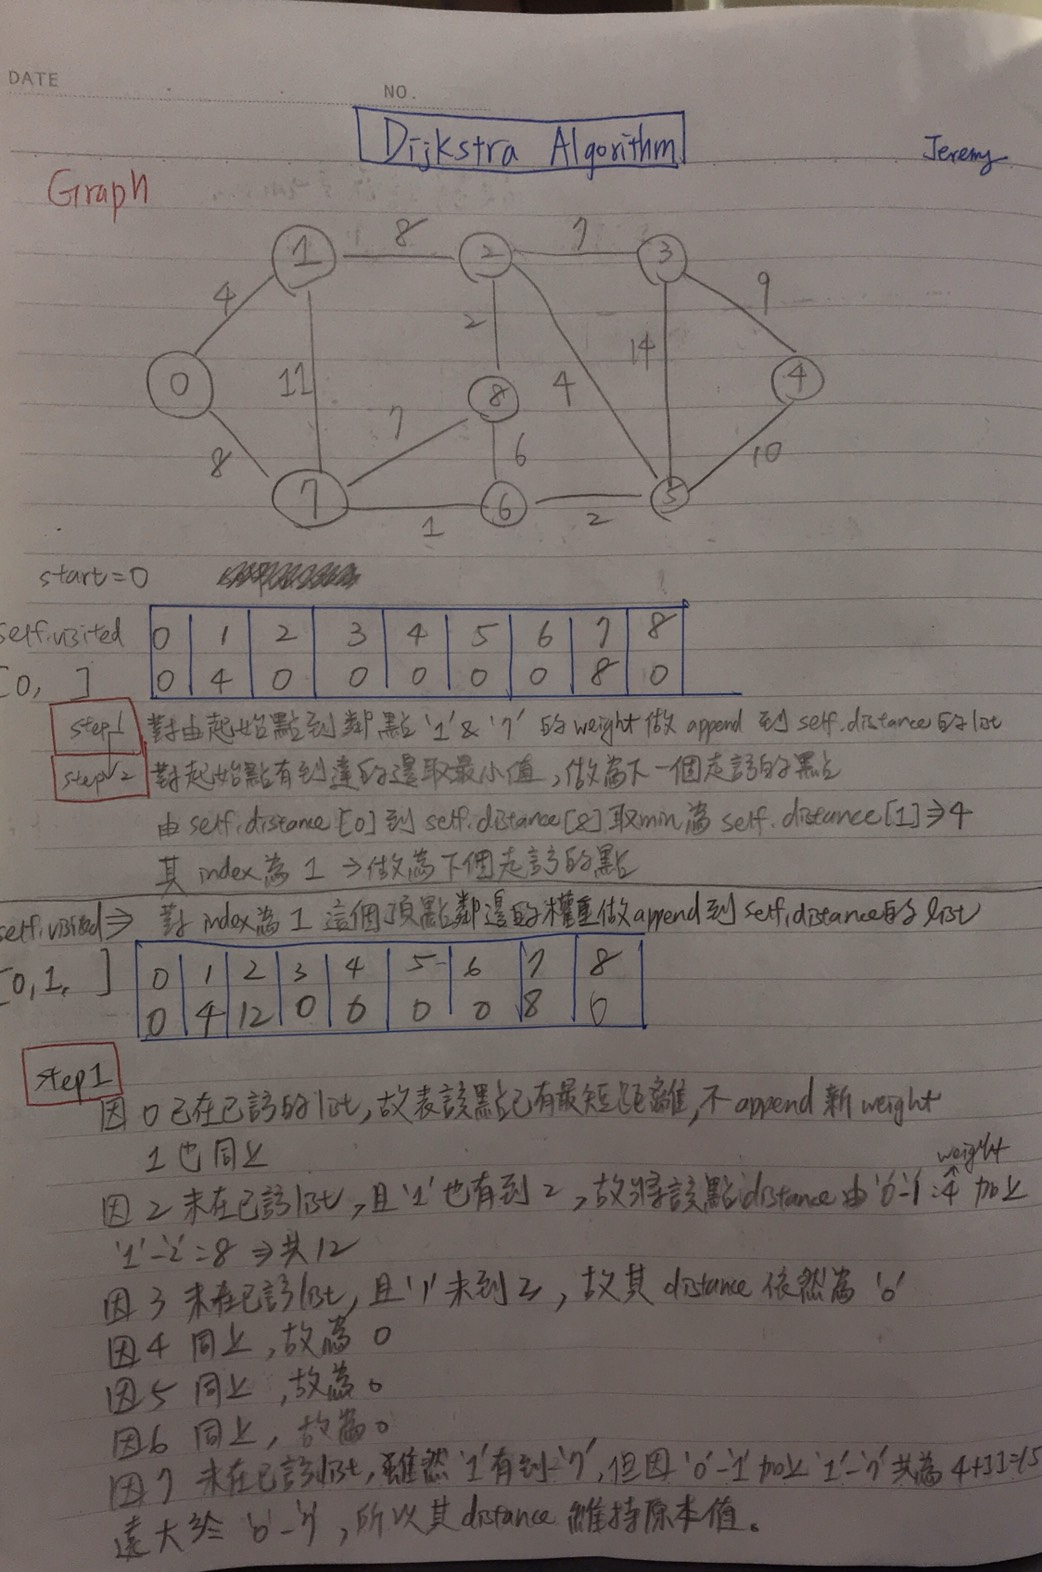

In [1]:
from IPython.display import Image
Image(filename='S__37601313.jpg')

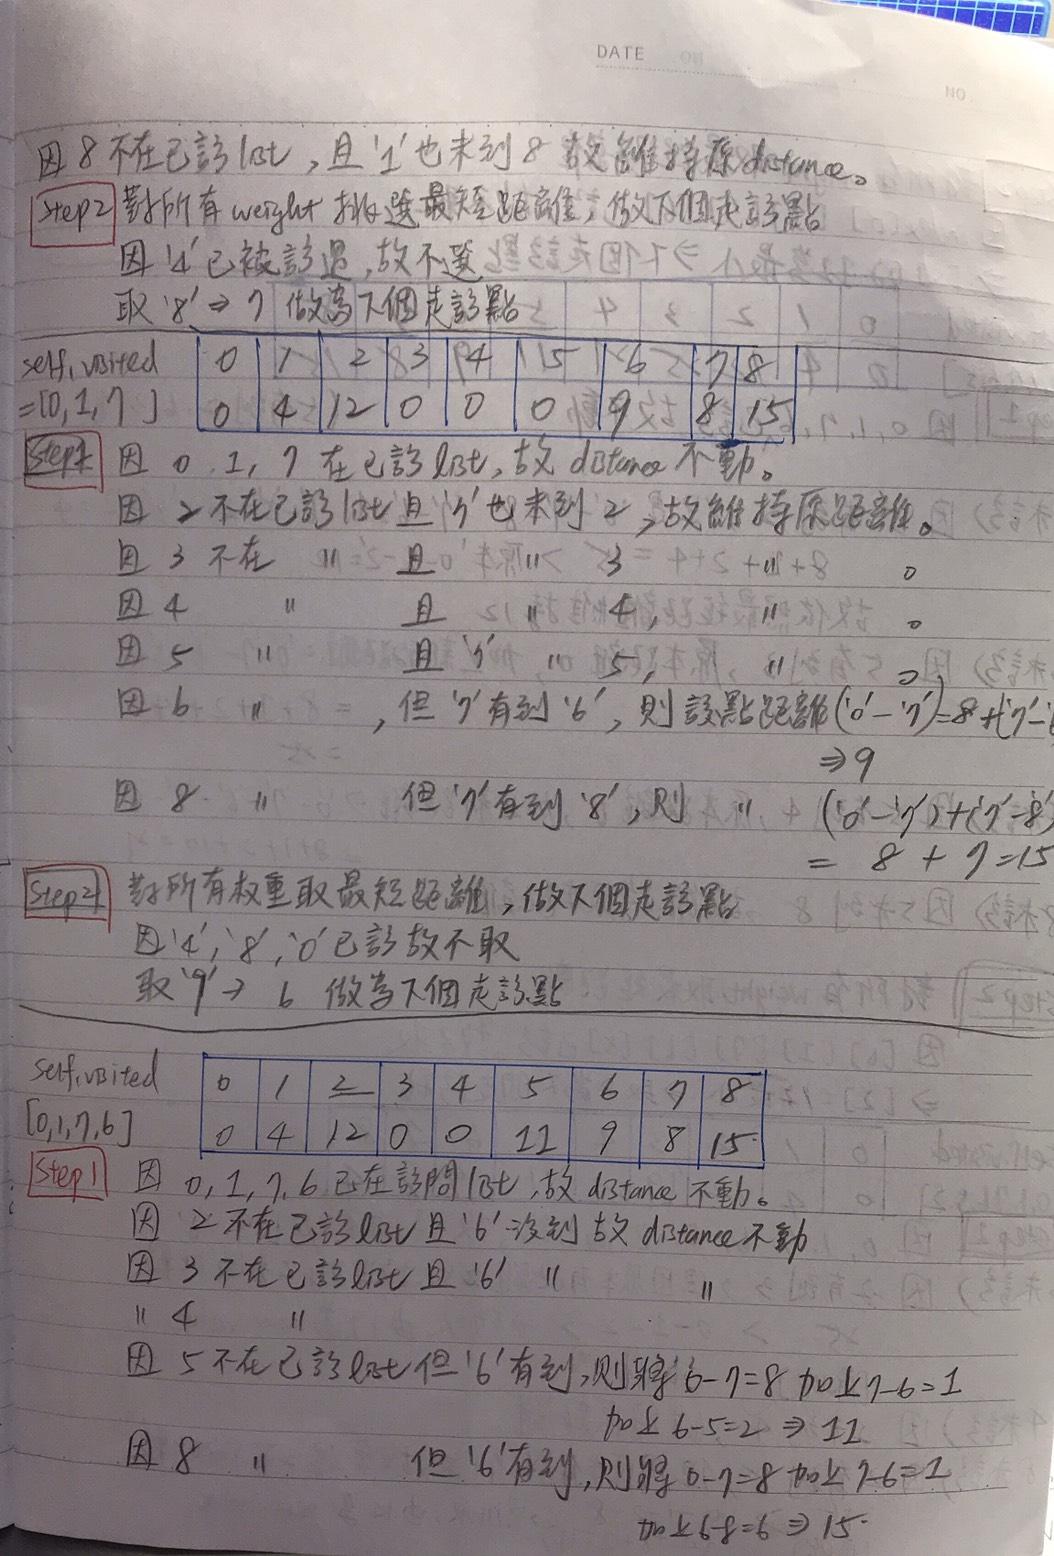

In [2]:
from IPython.display import Image
Image(filename='S__37601314.jpg')

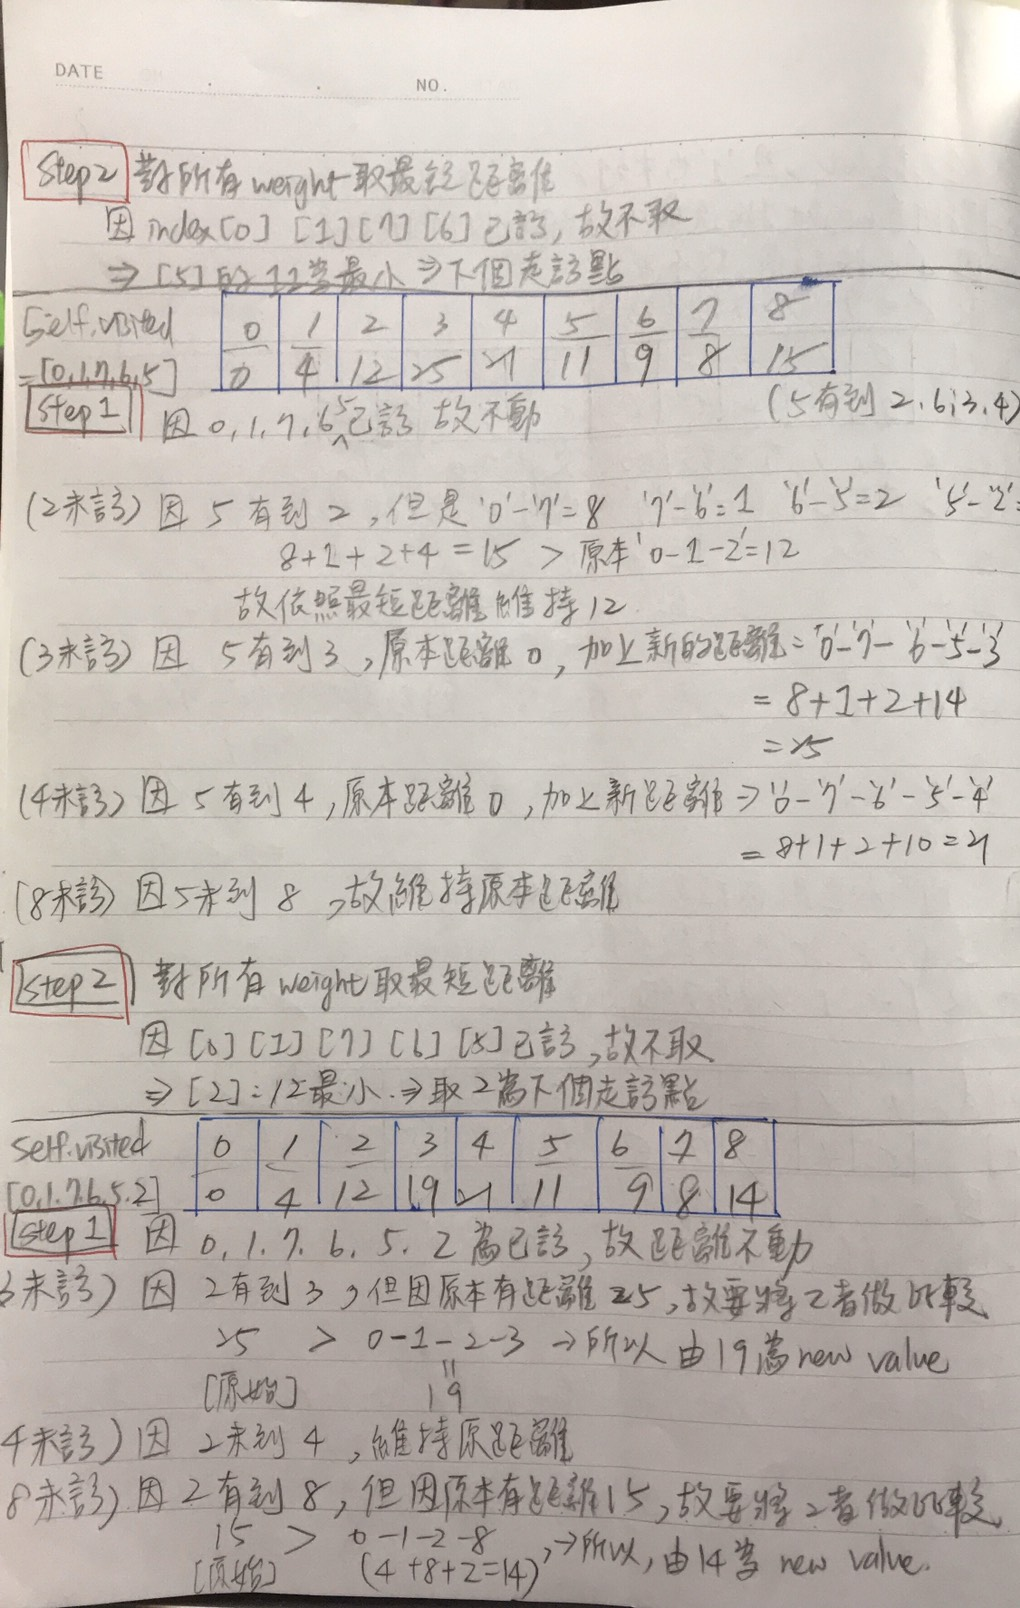

In [3]:
from IPython.display import Image
Image(filename='S__37601315.jpg')

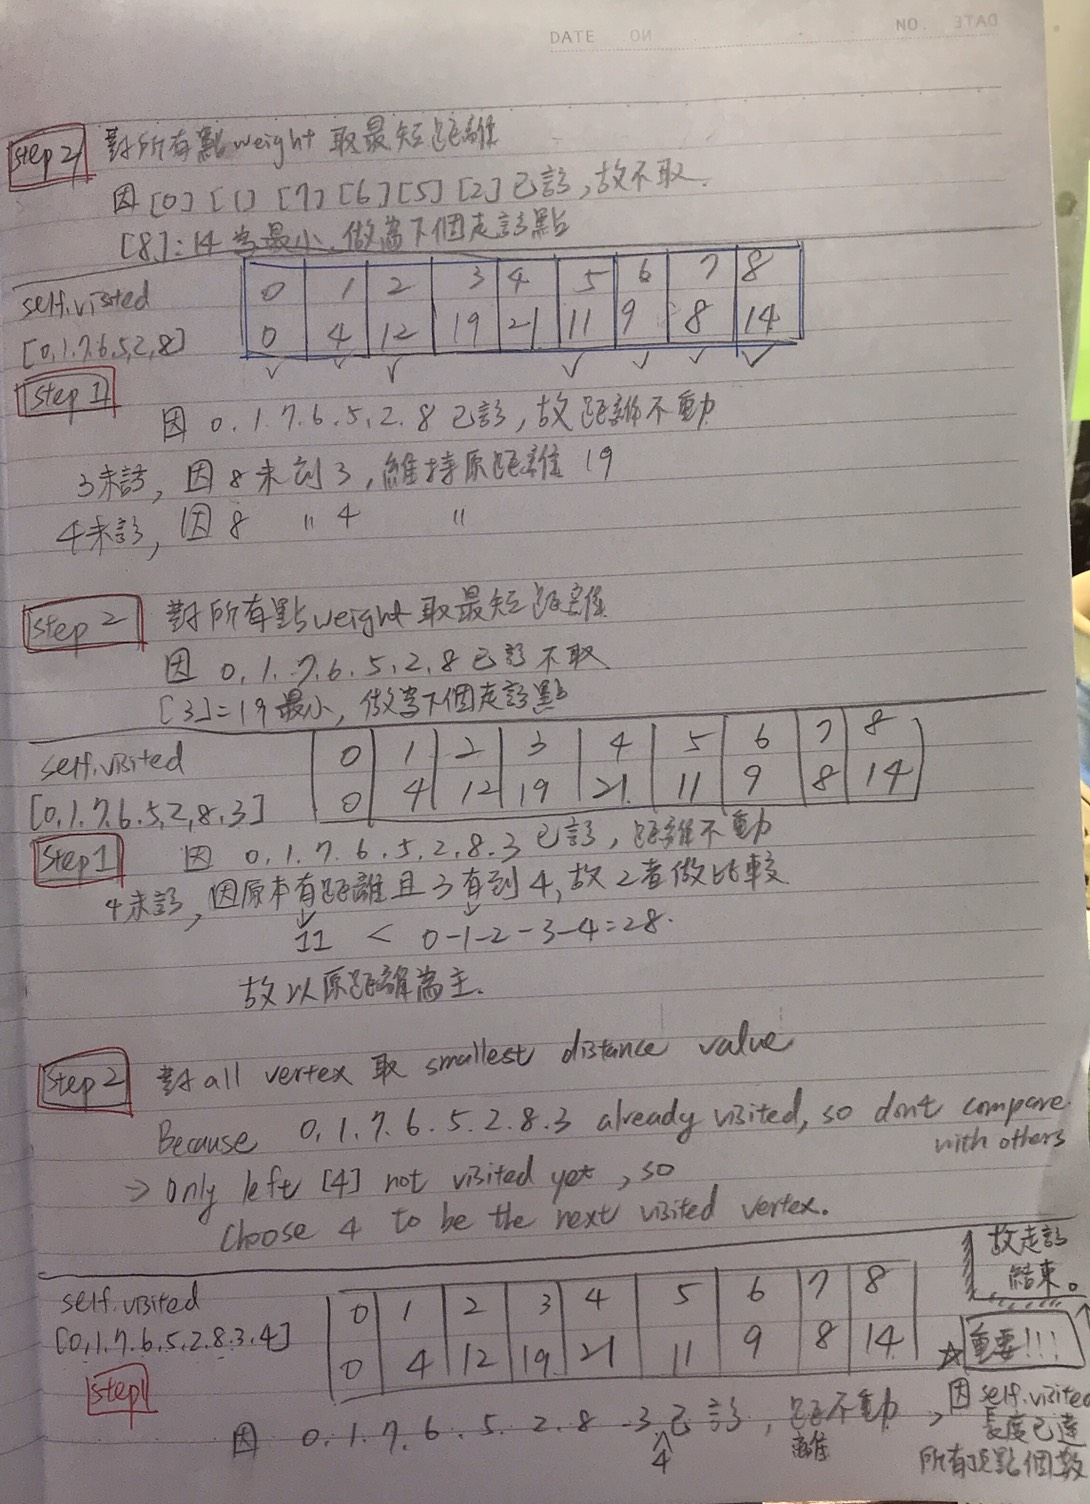

In [4]:
from IPython.display import Image
Image(filename='S__37601316.jpg')

# Dijkstra程式碼 ＆學習歷程

In [1]:
# Python program for Dijkstra's single  
# source shortest path algorithm. The program is  
# for adjacency matrix representation of the graph 
# Python program for Kruskal's algorithm to find 
# Minimum Spanning Tree of a given connected,  
# undirected and weighted graph 

from collections import defaultdict 

#Class to represent a graph 
class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = []
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)] #用來建立圖(graph)
        self.visited=[]
        self.distance=[]
        self.shortestpath={}
        self.Compare=[]
        self.k=[]
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
        self.graph_matrix[u][v]=w
        #self.u=u
        ##self.v=v
        #self.graph[self.u-self.v].append(w)
        #return self.graph
    def Dijkstra(self, s): 
        """
        :type s: int
        :rtype: dict
        """
        ver_total=self.V
        
        while len(self.visited)!=ver_total:#當我的拜訪list與我全部頂點個數不同時：
           
            i=s#將匯入的起始點給i
            self.visited.append(i)#在拜訪list中增加該點
            print('拜訪頂點')
            print(self.visited)
            for c in range(0,ver_total):#對所有頂點
                #print(i)
                #print(c)
                if len(self.distance)==ver_total:#如果存放（起始點到各頂點最短距離）list長度等於頂點個數（非第一次）
                    if c  in self.visited:#如果該頂點已經在拜訪過的list裡面，代表上個點可連接到他，且該distance最小
                        self.distance[c]=self.distance[c]#則維持原本距離
                        print('已經拜訪頂點')
                        print(c)
                    else:#如果該頂點不在拜訪過的list裡面，則代表該位置距離並非最小距離，則要進行比較
                        print('沒被拜訪頂點')
                        print(c)
                        if self.distance[c]!=0 and self.graph[i][c]!=0:#如果該距離不為0（原本有且下個點有經過該點）
                            print('gggggggggggggggggggggg')
                            print(self.distance[c])
                            print(self.graph[i][c])
                            if self.distance[c]>self.distance[i]+self.graph[i][c]:#如果 該原本距離加上下一個權重小於原本距離
                                self.distance[c]=self.distance[i]+self.graph[i][c]#則取代原本距離
                                print('原本有且下個點有經過該點')
                            else:#如果 上個條件不成立，代表沒有更短，
                                self.distance[c]=self.distance[c]#則照舊
                        elif self.distance[c]!=0 and self.graph[i][c]==0:#如果該原本距離不為0但下個點沒有經過該點
                            self.distance[c]=self.distance[c]#則照舊
                            print('如果該原本距離不為0但下個點沒有經過該點')
                        elif self.distance[c]==0 and self.graph[i][c]!=0:#如果原本沒有且下個點有經過
                            print('原本沒有，但下個點有經過，所以距離變成起始點到現在進行節點到下面c點')
                            self.distance[c]=self.distance[i]+self.graph[i][c]#則取代原本距離
                        else:#原本沒有且下個點沒有經過
                            print('原本沒有，下個點也沒有經過，')
                            self.distance[c]=self.distance[c]
                        print('第'+str(i)+'次')
                        print(self.distance)
                else:#如果存放距離list長度等於頂點個數不成立（第一次）
                    #for m in range(0,ver_total):#對所有頂點（
                        #print(m)
                    self.distance.append(self.graph[i][c])#將權重表中，頂點為i（橫列）對每個頂點(m直行)，加入到距離list裡面  
                    print('第一次距離list')
                    print(self.distance)
                #如果還有點沒有走訪，就要繼續找出下一個最小路徑之頂點 
            for k in range(0,ver_total):
                print('所有頂點')
                print(k)
                if k not in self.visited and self.distance[k]!=0:#如果該點未被走訪且起始點到該點的權重非0(起始點到該點權重取最小
                    
                    #print('該點未被走訪且該點權重不為0-k')
                    print(k)
                    #self.k.append(k)
                    
                    print('該點未被拜訪且該點權重值不為0-value')
                    print(self.distance[k])
                    
                  
                    self.Compare.append(self.distance[k])
                    #篩選出可以比較的權重，條件是：1.不能被走訪過 2.起始點到該點權重不能是0
                    print('是否可以將要比較的權重放進到Compare中？')
                    print(self.Compare)
                          
                if k==ver_total-1:#若k執行到最後一個了，代表已經篩選出可以比較的權重
                    for t in range(0,ver_total):#對目前權重邊的每個權重，若該權重是篩選出權重的最小值，則是下一個做dijkstra的頂點
                        if self.Compare:
                            if self.distance[t]==min(self.Compare):

                                print('確認要當下一個拜訪的點是否是正確的？')

                                Q=t
                                print(Q)
                                self.Compare=[]#結束之前清空給下一次用
                                #self.k=[]

                                return self.Dijkstra(Q)

        else:
            for e in range(0,ver_total):#對所有頂點，將起始點到每頂點最短距離新增到self.shortest這個字典中
                self.shortestpath.update({str(e):self.distance[e]})
            return self.shortestpath
        #回傳
    #def Kruskal(self)
        """
        :rtype: dict
        """

In [2]:
g=Graph(9)
g.graph=[[0,4,0,0,0,0,0,8,0],
        [4,0,8,0,0,0,0,11,0],
        [0,8,0,7,0,4,0,0,2],
        [0,0,7,0,9,14,0,0,0],
        [0,0,0,9,0,10,0,0,0],
        [0,0,4,14,10,0,2,0,0],
        [0,0,0,0,0,2,0,1,6],
        [8,11,0,0,0,0,1,0,7],
        [0,0,2,0,0,0,6,7,0]
        ];
print('Dijkstra',g.Dijkstra(0))

拜訪頂點
[0]
第一次距離list
[0]
第一次距離list
[0, 4]
第一次距離list
[0, 4, 0]
第一次距離list
[0, 4, 0, 0]
第一次距離list
[0, 4, 0, 0, 0]
第一次距離list
[0, 4, 0, 0, 0, 0]
第一次距離list
[0, 4, 0, 0, 0, 0, 0]
第一次距離list
[0, 4, 0, 0, 0, 0, 0, 8]
第一次距離list
[0, 4, 0, 0, 0, 0, 0, 8, 0]
所有頂點
0
所有頂點
1
1
該點未被拜訪且該點權重值不為0-value
4
是否可以將要比較的權重放進到Compare中？
[4]
所有頂點
2
所有頂點
3
所有頂點
4
所有頂點
5
所有頂點
6
所有頂點
7
7
該點未被拜訪且該點權重值不為0-value
8
是否可以將要比較的權重放進到Compare中？
[4, 8]
所有頂點
8
確認要當下一個拜訪的點是否是正確的？
1
拜訪頂點
[0, 1]
已經拜訪頂點
0
已經拜訪頂點
1
沒被拜訪頂點
2
原本沒有，但下個點有經過，所以距離變成起始點到現在進行節點到下面c點
第1次
[0, 4, 12, 0, 0, 0, 0, 8, 0]
沒被拜訪頂點
3
原本沒有，下個點也沒有經過，
第1次
[0, 4, 12, 0, 0, 0, 0, 8, 0]
沒被拜訪頂點
4
原本沒有，下個點也沒有經過，
第1次
[0, 4, 12, 0, 0, 0, 0, 8, 0]
沒被拜訪頂點
5
原本沒有，下個點也沒有經過，
第1次
[0, 4, 12, 0, 0, 0, 0, 8, 0]
沒被拜訪頂點
6
原本沒有，下個點也沒有經過，
第1次
[0, 4, 12, 0, 0, 0, 0, 8, 0]
沒被拜訪頂點
7
gggggggggggggggggggggg
8
11
第1次
[0, 4, 12, 0, 0, 0, 0, 8, 0]
沒被拜訪頂點
8
原本沒有，下個點也沒有經過，
第1次
[0, 4, 12, 0, 0, 0, 0, 8, 0]
所有頂點
0
所有頂點
1
所有頂點
2
2
該點未被拜訪且該點權重值不為0-value
12
是否可以將要比較的權重放進到Compare中？
[12]
所有頂點
3
所有頂點
4
所有頂點
5
所有

Dijkstra{'0':0,'1':4,"2":12,'3':19,'4':21,"5":11,"6":9,'7':8,"8":14}

一開始，並未構思好的邏輯判斷

# 錯誤

如果權重不為0，代表有連接到的頂點，前提：因為一開始在建立最短權重邊時，是一個一個邊append進去，所以我判斷式是寫當我的最短距離權重list長度與我的頂點總數不同的話，就不執行該權重是否是最短距離的判斷（因為是起始點到該點距離一訂最短）

，但如果該最短距離權重list長度與頂點數相同，就要執行最短邊的判斷。



if self.graph[i][c]!=0:#如果該頂點到其他頂點的權重不為零（代表該起始點有經過的邊，則
                
if len(self.distance)==ver_total:#如果有距離list(代表第二次)
  if self.distance[c]!=0 and self.distance[c]>self.distance[i]+self.graph[i][c]:
         self.distance[c]=self.distance[i]+self.graph[i][c]
  else:
      self.distance[c]=self.distance[c]
else:#(代表第一次)
    self.distance.append(self.graph[i][c])
    else:#代表該點沒有經過，則用原本距離
   if len(self.distance)!=ver_total:#如果第一次走訪，則將該權重接續到self.distance的list當中
         self.distance.append(self.graph[i][c])
   else:#如果不是第一次走訪且該頂點到點的權重為0，則維持原始距離
       self.distance[c]=self.distance[c

確認if L in W 功能

In [17]:
if 2  in W:
    print(True)
else:
    print(False)

True


In [72]:
for k in range(0,3):
    print(k)

0
1
2


In [195]:
W=[1,3,2,0,13,24,33,21,0,0,3,4,20]

In [184]:
W

[1, 3, 2, 0, 13, 24, 33, 21, 0, 0, 3, 4, 20]

# 錯誤1：
一開始比大小要選權重最小，我的想法是，將非0的留下來比較，0用下面的函數刪掉，但因為刪掉以後，要取最小值的index，如果我一開始就把0移除，該陣列對應的index就不是原本對應的value了，取最小值也就不一定能娶到正確的index。所以這個函數我沒有用他。

In [187]:
def remove_zero(W):
    for i in W:#對所有在list中的點，如果該list點等於0則移除不比較，接著對剩下點取最小值的index
        #print(i)
        
        while i==0: #當該W list裡面有元素為0時，印出該點的index並且移除該元素，並回傳find_min繼續過濾是否有0直到 i==0不成立
           # W.
            #print(W.index(i))
            W.pop(W.index(i)) 
            #print(W)
            remove_zero(W)
            
            
            return W
        #else:
           # return W.index(min(W))
            
        
        #else:#當該i==0不成立時就回傳該W list的最小值的index
           # return W.index(min(W))
        

In [209]:
for i in range(0,len(W)):
    if i not in R and W[i]!=0:
        if i:
            print(W[i])
            
            #W[i].index(min(W[i]))
        #print(i)
        #print(W.index(min(W)))
        #print(W[i])

13
24
33
21
3
4
20


# 建立W list做測試

In [198]:
W

[1, 3, 2, 0, 13, 24, 33, 21, 0, 0, 3, 4, 20]

In [188]:
remove_zero(W)

[1, 3, 2, 13, 24, 33, 21, 3, 4, 20]

In [168]:
if i not in R:
    W.index(min(W))

0

In [189]:
R=[0,1,2]

如果該點沒有出現在已經拜訪的list，則可將其列入權重比較後最小值所要找的index，

# 錯誤2：
曾經想過要用尋找最小值的key函數，但因為超過python 迴圈最大限制所以不用此函數。

In [133]:
def find_minkey(W):

    K=W.index(min(W))
    if K in R:
        return find_minkey(W)
 

In [134]:
find_minkey(W)

RecursionError: maximum recursion depth exceeded in comparison

In [37]:
for d in W:
    if d!=0:
        find_minkey(W)
        print(d)

NameError: name 'find_min' is not defined

# 因為原本要用default dict，所以做了些測試，但是後來用list來紀錄每次起始點到各點的最短距離

In [21]:
from collections import defaultdict

b=defaultdict(int)
#b['0'].append(1)

In [46]:
b['0']=1

In [42]:
b['1']=2

In [49]:
for key,value in b.items():
    

dict_items([('0', [1])])

In [8]:
P=[]
for i in range(0,5):
    P.append(i)
P

[0, 1, 2, 3, 4]

In [9]:
O=[3,1,5,7,12]

In [30]:
T

{'0': 3, '1': None, '2': None}

# 因為最後要將資料用字典結構回傳，所以我做了一些測試。

In [41]:
T={}
T={'0':None,'1':None,'2':None}
T['0']=2
#T=['0','1','2','3','4']
#Y=0123456
#for i in 
for i in range(0,5):
    T.update({str(i):O[i]})

In [42]:
T

{'0': 3, '1': 1, '2': 5, '3': 7, '4': 12}

In [37]:
Y=str(123456)
Y

'123456'

In [19]:
for i in range(0,5):
    T.append()

['0',
 '1',
 '2',
 '3',
 '4',
 '(i)',
 '(i)',
 '(i)',
 '(i)',
 '(i)',
 '(i)',
 '(i)',
 '(i)',
 '(i)',
 '(i)']

In [17]:
f=dict(zip(T,O))
f

{'0': 3, '1': 1, '2': 5, '3': 7, '4': 12}

In [13]:
P=[2,3,1,30,2]

In [11]:
f.update({'3':2})

In [96]:
g=Graph(9)
g.graph=[[0,4,0,0,0,0,0,8,0],
        [4,0,8,0,0,0,0,11,0],
        [0,8,0,7,0,4,0,0,2],
        [0,8,0,7,0,4,0,0,2],
        [0,0,7,0,9,14,0,0,0],
        [0,0,0,9,0,10,0,0,0],
        [0,0,4,14,10,0,2,0,0],
        [0,0,0,0,0,2,0,1,6],
        [8,11,0,0,0,0,1,0,7],
        [0,0,2,0,0,0,6,7,0]
        ];
print('Dijkstra',g.Dijkstra(0))


Dijkstra{'0':0,'1':4,"2":12,'3':19,'4':21,"5":11,"6":9,'7':8,"8":14}




#g=Graph(4)
#g.addEdge(0,1,10)
#g.addEdge(0,2,6)
#g.addEdge(0,3,5)
#g.addEdge(1,3,15)
#g.addEdge(2,3,4)


defaultdict(list, {-1: [10, 4], -2: [6, 15], -3: [5]})

輸入測資測試函式

# 想法：當全部頂點都已經訪問完，要將最後起始點到各頂點知最短距離list字典的結構回傳，所以下面是我對字典做的測試。

In [197]:
t=[2,3,4,2,1,10,2]

In [215]:
t={'0':12,'1':2,'3':3}

In [216]:
t

{'0': 12, '1': 2, '3': 3}

In [201]:
type(t)

dict

In [194]:
W={'0':12,'1':3,'2':30}

用上面的方法建立字典

In [196]:
W['0']

12

In [131]:
type(W)

dict

In [205]:
W['0']=2

In [203]:
W

{'0': 2, '1': 3, '2': 30}

In [15]:
key=1

In [20]:
E=dict(e=3)

In [21]:
E

{'e': 3}

In [142]:
o=[3,4,2,1,5,-3]

 # 想法：當做完第一次，就是做完起始點到各點權重時，要選擇下一個起始點時，要從起始點到所有頂點的權重中，選出最小的權重，該index就是下一個起始點，所以我做一些測試，要找到list最小值以及最小值的index

尋找最小值index的方法

In [146]:
o.index(min(o))

5

測試matrix資料結構操作方法

In [159]:
r=[[2,3,4,1],
  [3,1,5,0],
  [1,4,2,9]]

In [163]:
type(r)

list

In [160]:
min(r[0])

1

因為要用到找權重表中最小值，所以做min測試

In [164]:
r.index(r[0])

0

因為要用到找權重表中最小值的index，所以做min測試

尋找matrix最小值的方法

In [165]:
r[0].index(min(r[0]))

3

In [166]:
Q=[]
for data in r[0]:
    print(data)
    if data not in 

2
3
4
1


用來測驗自己邏輯是否正確，設定了一個E代表已經訪問的list，o代表起始點到各頂點距離，最後進行條件判斷。


# 錯誤3:
一開始以為這樣的邏輯判斷式應該沒問題，但實際驗證發現，如果我用現在這種判斷式會導致前面的vertex先比較找最小值，因為我的for迴圈是從1開始的，一直持續到最後，所以只要該頂點的權重值前面先符合我再邏輯判斷設定條件是 index不在走訪區，如果index不在走訪區該index的值也不能為0，就會執行之後邏輯，所以最後我用一個條件判斷
確定所有頂點都走過一遍，才進行比較！

In [167]:
E=[3,4]#已經訪問

In [172]:
o=[3,4,2,1,5,-3]

In [183]:
A=[]#這是新增的，是用來存放權重大於0的值 因為要得到最小權重的index 先篩
for data in o:
    #print('3')
    #print(data)
    if data>0:
        for i in range(0,len(o)):#對所有點篩選大於零的權重
            if data==o[i]:#如果 o list 的某值與data相等
                A.append(i)#放到A 裡面
        #print(A)
        for r in A:#對A中的 index [0,1,2,3,4]
            print(A)
            if r not in E:#如果該index未走訪
                #print(r)
                P=A.index(min(A))#最小權重的頂點為P，做下一個走訪點
                #print(P)
                #print(P)
               
        #print (data)
    

[0]
[0, 1]
[0, 1]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [145]:
A

[0, 1, 2, 3, 4]

In [13]:
g=9
H=[[0 for column in range(g)]for raw in range(g)]

In [15]:
H[0][0]=3

In [36]:
# Python program for Dijkstra's single  
# source shortest path algorithm. The program is  
# for adjacency matrix representation of the graph 
# Python program for Kruskal's algorithm to find 
# Minimum Spanning Tree of a given connected,  
# undirected and weighted graph 

from collections import defaultdict 

#Class to represent a graph 
class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = []
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)] #用來建立圖(graph)
        self.visited=[]
        self.distance=[]
        self.shortestpath={}
        self.Compare=[]
        self.k=[]
        self.graph_k=defaultdict(int)
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
        self.graph_k[str(u)+str('-')+str(v)]=w
        #self.u=u
        ##self.v=v
        #self.graph[self.u-self.v].append(w)
        #return self.graph
        return self.graph_k
    def Dijkstra(self, s): 
        """
        :type s: int
        :rtype: dict
        """
        ver_total=self.V
        
        while len(self.visited)!=ver_total:#當我的拜訪list與我全部頂點個數不同時：
           
            i=s#將匯入的起始點給i
            self.visited.append(i)#在拜訪list中增加該點
            print('拜訪頂點')
            print(self.visited)
            for c in range(0,ver_total):#對所有頂點
                #print(i)
                #print(c)
                if len(self.distance)==ver_total:#如果存放距離list長度等於頂點個數（非第一次）
                    if c  in self.visited:#如果該頂點已經在拜訪過的list裡面，代表上個點可連接到他，且該distance最小
                        self.distance[c]=self.distance[c]#則維持原本距離
                        print('已經拜訪頂點')
                        print(c)
                    else:#如果該頂點不在拜訪過的list裡面，則代表該位置距離並非最小距離，則要進行比較
                        print('沒被拜訪頂點')
                        print(c)
                        if self.distance[c]!=0 and self.graph[i][c]!=0:#如果該距離不為0（原本有且下個點有經過該點）
                            print('gggggggggggggggggggggg')
                            print(self.distance[c])
                            print(self.graph[i][c])
                            if self.distance[c]>self.distance[i]+self.graph[i][c]:#如果 該原本距離加上下一個權重小於原本距離
                                self.distance[c]=self.distance[i]+self.graph[i][c]#則取代原本距離
                                print('原本有且下個點有經過該點')
                            else:#如果 上個條件不成立，代表沒有更短，
                                self.distance[c]=self.distance[c]#則照舊
                        elif self.distance[c]!=0 and self.graph[i][c]==0:#如果該原本距離不為0但下個點沒有經過該點
                            self.distance[c]=self.distance[c]#則照舊
                            print('如果該原本距離不為0但下個點沒有經過該點')
                        elif self.distance[c]==0 and self.graph[i][c]!=0:#如果原本沒有且下個點有經過
                            print('原本沒有，但下個點有經過，所以距離變成起始點到現在進行節點到下面c點')
                            self.distance[c]=self.distance[i]+self.graph[i][c]#則取代原本距離
                        else:#原本沒有且下個點沒有經過
                            print('原本沒有，下個點也沒有經過，')
                            self.distance[c]=self.distance[c]
                        print('第'+str(i)+'次')
                        print(self.distance)
                else:#如果存放距離list長度等於頂點個數不成立（第一次）
                    #for m in range(0,ver_total):#對所有頂點（
                        #print(m)
                    self.distance.append(self.graph[i][c])#將權重表中，頂點為i（橫列）對每個頂點(m直行)，加入到距離list裡面  
                    print('第一次距離list')
                    print(self.distance)
                #如果還有點沒有走訪，就要繼續找出下一個最小路徑之頂點 
            for k in range(0,ver_total):
                print('所有頂點')
                print(k)
                if k not in self.visited and self.distance[k]!=0:#如果該點未被走訪且該點權重不為0
                    
                    #print('該點未被走訪且該點權重不為0-k')
                    print(k)
                    self.k.append(k)
                    
                    print('該點未被拜訪且該點權重值不為0-value')
                    print(self.distance[k])
                    
                  
                    self.Compare.append(self.distance[k])
                    print('是否可以將要比較的權重放進到Compare中？')
                    print(self.Compare)
                          
                if k==ver_total-1:
                    for t in range(0,ver_total):
                        if self.Compare:
                            if self.distance[t]==min(self.Compare):

                                print('確認要當下一個拜訪的點是否是正確的？')

                                Q=t
                                print(Q)
                                self.Compare=[]#結束之前清空給下一次用
                                self.k=[]

                                return self.Dijkstra(Q)

        else:
            for e in range(0,ver_total):
                self.shortestpath.update({str(e):self.distance[e]})
            return self.shortestpath
        
    #def Kruskal(self)
        """
        :rtype: dict
        """

# 補：原本欲使用的defaultdict，自己在做測試，後來改用matrix方式

In [37]:
g=Graph(4)
g.addEdge(0,1,10)
g.addEdge(0,2,6)
g.addEdge(0,3,5)
g.addEdge(1,3,15)
g.addEdge(2,3,4)


defaultdict(int, {'0-1': 10, '0-2': 6, '0-3': 5, '1-3': 15, '2-3': 4})

In [30]:
E=str(2)+str('-')+str(3)

In [31]:
E

'2-3'

# Kruskal學習歷程

# Kruskal 原理：

步驟一：先建立一個放權重邊的list，一個頂點root的list(初始化每個為-1)

步驟二：將所有權重邊由小到大排序，並append到權重邊的list裡面，對每個邊依序從小到大做kruskal

步驟三：從最小的邊起，對每個邊的所連接兩頂點找root，看頂點root的list，如果權重連接的兩個頂點root不同，則做union(同個set且root相同)，如果兩個頂點root相同，則不union，因為會形成cycle，以此類推持續執行直到所有邊都被執行完，最後再將連通圖最短距離回傳。

# 找root的方法


#一開始的想法是將有同樣的root的頂點放在同一個set當中，也代表這個set裡面頂點是同一個root，
然後當下個邊的兩個頂點要做判斷的時候，再看該兩點是否屬於同一個set，
如果是同個set，則不union，反之union 。 


#但是後來我改用另一個方法，
我有建立一個rootlist 
專門紀錄每個頂點的目前root是什麼，
若這兩的root一樣，則就不union(代表是同個set)，
若這兩個root不一樣(代表不同set)，則union，
所以透過這個藉由兩頂點目前是否是同個root的方法，則可做union的判斷。

# 測試1:對set做測試

In [38]:
my_set = {1, 2, 3}
print(my_set)


{1, 2, 3}


上面這個set就是我一開始要用來紀錄屬於同個root的頂點

In [39]:
len(my_set)

3

In [42]:
my_set.remove()

KeyError: 0

In [41]:
my_set

{2, 3}

上面就是在思考，若用set要怎麼做union，但是後來換成紀錄該root的方法，所以這個就沒使用。

In [43]:
R={'0-1':2,'3-4':5,'3-5':1,'4-6':9}

但我後來使用的方法，就是建立一個所有頂點個數的list，且每個初始化為-1

In [7]:
P=4 
root_finding=[-1 for column in range(P)]

In [8]:
print('頂點個數：'+str(P))
root_finding

頂點個數：4


[-1, -1, -1, -1]

# 步驟二：權重邊排序的方法

一開始，要進行kruskal的時候，會需要將所有權重邊由小到大進行排序之後，對所有排序的邊做findroot及union的動作，
所以我就想建立一個list紀錄，並且將這個list當中的邊sort()排序一遍，最後由最小的邊開始進行findroot 及 union

In [74]:
K=[]
for i in R:
    K.append(R[i])
    print (R[i])

2
5
1
9


In [75]:
K.sort()

In [76]:
K.pop(0)

1

In [77]:
K

[2, 5, 9]

# 這個是我要將頂點間的權重加入到graph_matrix，所以對graph_matrix做了解。

In [81]:
vertices=4
graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]

In [83]:
graph_matrix[u][v]

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

# 將點到點的權重資料，做成矩陣的結構

In [85]:
graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
def addEdge(u,v,w):
    graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
    graph_matrix[u][v]=w

# Kruskal 流程圖：

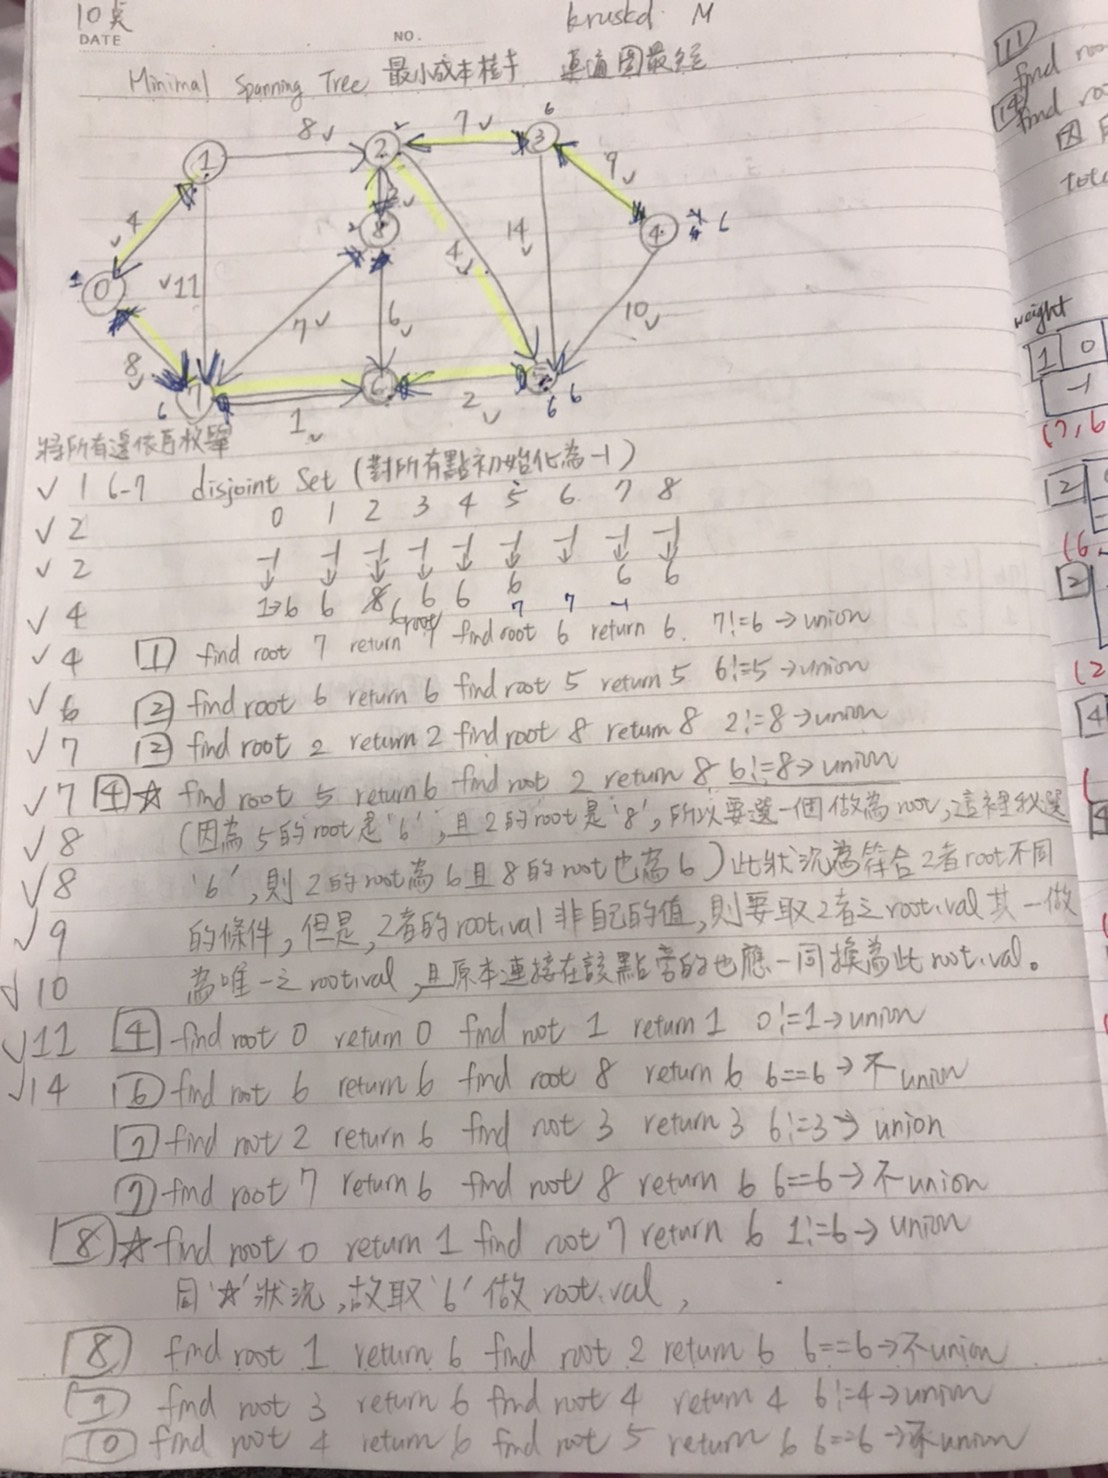

In [76]:
from IPython.display import Image
Image(filename='S__37748744.jpg')

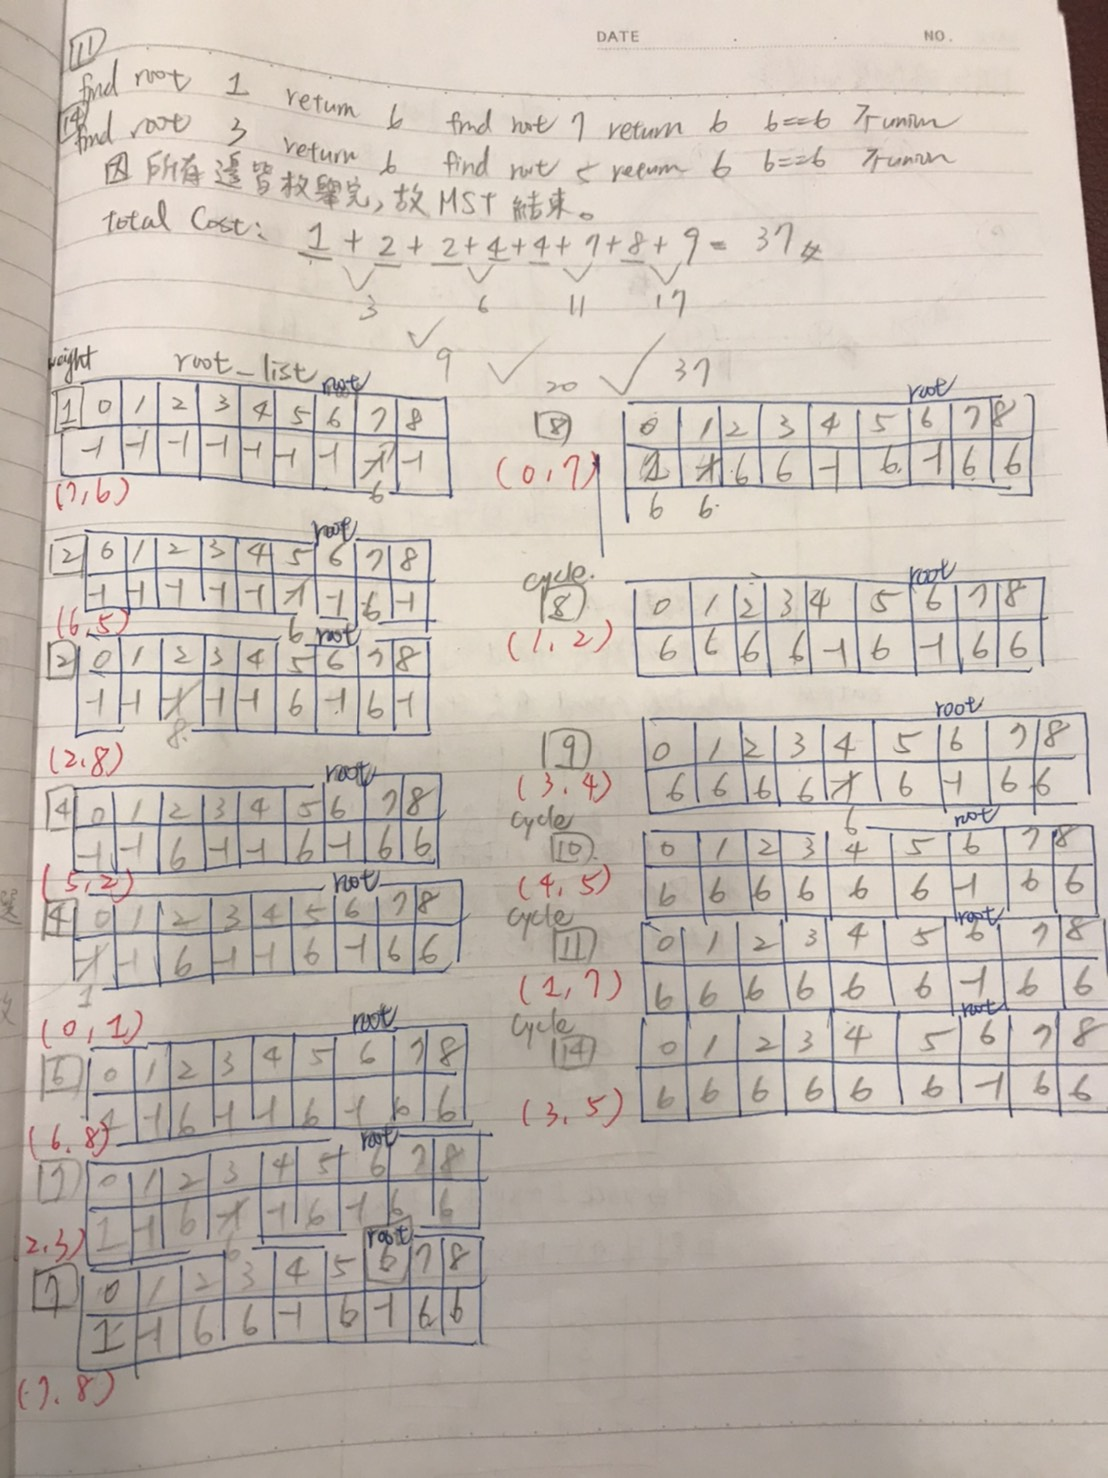

In [77]:
from IPython.display import Image
Image(filename='S__37748745.jpg')

In [15]:
class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = []
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)] #用來建立圖(graph)
        self.root_finding=[-1 for column in range(vertices)]
        self.visited=[]
        self.distance=[]
        self.shortestpath={}
        self.Compare=[]
        self.k=[]
        self.weightlist=[]
        #self.final=[]
        self.last={}
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
        self.graph_matrix[u][v]=w
        #return self.graph_matrix
    def findroot(self,i):
        return i
    def Kruskal(self):
        """
        :rtype: dict
        """
        
        C=[]
        var_total=self.V
        #for q in range(0,var_total):
         #   self.root_finding.append(q)
        #print(self.weightlist)
       # weight_list=[]
        #var_total=self.V
        #self.weight_list=[]
            #print(self.weight_list)
        if self.weightlist==[]:
            for i in range(0,var_total):
                print('矩陣的i（橫軸）')
                print(i)
                for j in range(0,var_total):
                    print('矩陣的j（縱軸）')   
                    print(j)
                    if self.graph_matrix[i][j]!=0:
                        print('權重邊不等於零的權重')
                        print(self.graph_matrix[i][j])
                        print('權重邊不等於零的權重list（加入新元素前）')
                        print(self.weightlist)
                        
                        self.weightlist.append(self.graph_matrix[i][j])
                        self.weightlist.sort()
                        print('權重邊不等於零的權重list（加入新元素後）')
                        print(self.weightlist)
                        #上面加入權重到list沒問題！
            if i==(var_total-1) and j==(var_total-1):
                print('確定所有權重邊皆已經走過')
                    #從權重邊最前面元素開始，對該權重所連接兩點進行找root：
                print('i')
                    #如果權重list長度不為0代表還沒走訪結束，繼續執行下面行動
                while len(self.weightlist)!=len(C):
                    print(len(self.weightlist))
                    print(len(C))
                    print('當權重list長度不為0')
                        #對從權重表0到權重表最後一個元素執行下面程式
                    for c in range(0,len(self.weightlist)):
                        print('對權重list所有元素')
                            #print(data)
                            #如果在權重表第c個權重與整個大權重表某個值相等則，要對該兩點進行找root
                        for i in range(0,var_total):
                            for j in range(0,var_total):
                                print('i')
                                print(i)
                                print('j')
                                print(j)
                                print('c')
                                print(c)
                                    
                                if self.graph_matrix[i][j]==self.weightlist[c]:
                                    print('如果大權重表（所有頂點）中有小權重表的權重')
                                    C.append(self.weightlist[c])
                                    print('第'+str(c)+'次處理的權重')
                                    print(self.weightlist[c])
                                   #     if self.root_finding[i]!=self.root_finding[j]:
                                    #        self.root_finding[i]=j
                                     #       self.last.update({str(i)+str('-')+str(j):self.graph_matrix[i][j]})
                                      #  elif self.root_finding[i]==self.root_finding[j]:
                                       #     pass
                                  
                                #if len(self.weightlist)==len(C):
                                 #       return self.last
                                            
                                        
                                        #如果兩個頂點都仍在初始化，則將前面的頂點的根節點改為後面頂點
                                        #print('所有頂點root都為-1（前')
                                        #print(self.root_finding)
                                        #if self.root_finding[i].findroot()

                                    if self.root_finding[i]==-1 and self.root_finding[j]==-1:
                                        #print('pppppppp1')
                                        print('所有頂點root都為-1（後')
                                        #print(self.root_finding)
                                        #print('該點皆為初始化root為-1')
                                        if self.root_finding[i]==self.root_finding[j]:
                                             #   print
                                            print('第'+str(c)+'次處理的權重所連接頂點')
                                            print(str(i)+'和'+str(j))
                                            self.root_finding[i]=j
                                            self.root_finding[j]=j
                                               # root=j
                                               # self.final.append(self.graph_matrix[i][j])
                                            self.last.update({str(i)+str('-')+str(j):self.graph_matrix[i][j]})
                                            print(str(i)+'和'+str(j)+'的頂點list')
                                            print(self.root_finding)    
                                    elif self.root_finding[i]!=-1 and self.root_finding[j]==-1:
                                        print('第'+str(c)+'次處理的權重所連接頂點')
                                        print(str(i)+'和'+str(j))
                                         #   print('其中一點有root，另一點沒有root')
                                          #  if self.root_finding[i]!=root:
                                                
                                        self.root_finding[j]=self.root_finding[i]
                                           # self.final.append(self.graph_matrix[i][j])
                                        self.last.update({str(i)+str('-')+str(j):self.graph_matrix[i][j]})
                                        print(str(i)+'和'+str(j)+'的頂點list')
                                        print(self.root_finding)    
                                    elif self.root_finding[i]==-1 and self.root_finding[j]!=-1:
                                        print('self.root_finding[i]==-1 and self.root_finding[j]!=-1')
                                        print('第'+str(c)+'次處理的權重所連接頂點')
                                        print(str(i)+'和'+str(j))
                                            
                                        self.root_finding[i]=self.root_finding[j]
                                       #     self.final.append(self.graph_matrix[i][j])
                                        self.last.update({str(i)+str('-')+str(j):self.graph_matrix[i][j]})
                                        print(str(i)+'和'+str(j)+'的頂點list')
                                        print(self.root_finding)    

                                    elif self.root_finding[i]!=-1 and self.root_finding[j]!=-1:
                                        print('有cycle的')        #有cycle的
                                        print('第'+str(c)+'次處理的權重所連接頂點')
                                        print(str(i)+'和'+str(j))
                                        if self.root_finding[i]==self.root_finding[j]:
                                            self.root_finding[i]=self.root_finding[j]
                                            #self.root_finding[i]=self.root_finding[j]
                                            print(str(i)+'和'+str(j)+'的頂點list')
                                            print(self.root_finding)
                                        elif self.root_finding[i]!=self.root_finding[j]:
                                            R=self.root_finding[i]
                                            print('union聯合')
                                            self.root_finding[i]=self.root_finding[j]
                                            print(self.root_finding)
                                            for s in range(0,len(self.root_finding)):
                                                if self.root_finding[s]==R:
                                                    print('s is looking for the same root as self.root_finding[i]')
                                                    print(s)
                                                    self.root_finding[s]=self.root_finding[j]
                                                        #print(self.root_finding[j])
                                                    print(self.root_finding)
                                            self.last.update({str(i)+str('-')+str(j):self.graph_matrix[i][j]})
                                            print(str(i)+'和'+str(j)+'的頂點list')
                                            print(self.root_finding)
                                    #if len(C)==len(self.weightlist):
                                     #   print('走訪結束!!!!!')
                                        
                                      #  for m in range(0,len(self.final)):
                                       #     for i in range (0,var_total):
                                        #        print('i')
                                         #       print(i)
                                          #      for j in range(0,var_total):
                                           #         print('j')
                                            #        print(j)
                                             #       print(self.final)
                                              #      if self.graph_matrix[i][j]==self.final[m]:
                                               #         self.last.update({str(i)+str('-')+str(j):self.final[m]})
                                                #        print(self.last)
                                                 #       if len(self.last)==len(self.weightlist):
                                                                
                                                                                   
                                                  #          return self.last
                                                                                   

                                        

                            
                        
                    else:
                        print(self.graph_matrix)
                        return self.last
                     #   for k in self.final:        
                      #      if self.graph_matrix[u][v]==k:
                       #         self.last={str(u)+str('-')+str(v):k}
                        #        print(self.last)
                         #       return self.last

                            

# 用測資對kruskal做測試

In [16]:
g=Graph(4)
g.addEdge(0,1,10)
g.addEdge(0,2,6)
g.addEdge(0,3,5)
g.addEdge(1,3,15)
g.addEdge(2,3,4)
#g.addEdge(2,4,35)
#g.addEdge(1,4,40)
#g.addEdge(0,4,45)
#g.addEdge(1,2,50)
#g.addEdge(4,5,55)
#g.addEdge(3,4,9)
#g.addEdge(5,4,10)
#g.addEdge(1,7,11)
#g.addEdge(3,5,14)

#print('Kruskal',g.Kruskal())

In [17]:
print('Kruskal',g.Kruskal())

矩陣的i（橫軸）
0
矩陣的j（縱軸）
0
矩陣的j（縱軸）
1
權重邊不等於零的權重
10
權重邊不等於零的權重list（加入新元素前）
[]
權重邊不等於零的權重list（加入新元素後）
[10]
矩陣的j（縱軸）
2
權重邊不等於零的權重
6
權重邊不等於零的權重list（加入新元素前）
[10]
權重邊不等於零的權重list（加入新元素後）
[6, 10]
矩陣的j（縱軸）
3
權重邊不等於零的權重
5
權重邊不等於零的權重list（加入新元素前）
[6, 10]
權重邊不等於零的權重list（加入新元素後）
[5, 6, 10]
矩陣的i（橫軸）
1
矩陣的j（縱軸）
0
矩陣的j（縱軸）
1
矩陣的j（縱軸）
2
矩陣的j（縱軸）
3
權重邊不等於零的權重
15
權重邊不等於零的權重list（加入新元素前）
[5, 6, 10]
權重邊不等於零的權重list（加入新元素後）
[5, 6, 10, 15]
矩陣的i（橫軸）
2
矩陣的j（縱軸）
0
矩陣的j（縱軸）
1
矩陣的j（縱軸）
2
矩陣的j（縱軸）
3
權重邊不等於零的權重
4
權重邊不等於零的權重list（加入新元素前）
[5, 6, 10, 15]
權重邊不等於零的權重list（加入新元素後）
[4, 5, 6, 10, 15]
矩陣的i（橫軸）
3
矩陣的j（縱軸）
0
矩陣的j（縱軸）
1
矩陣的j（縱軸）
2
矩陣的j（縱軸）
3
確定所有權重邊皆已經走過
i
5
0
當權重list長度不為0
對權重list所有元素
i
0
j
0
c
0
i
0
j
1
c
0
i
0
j
2
c
0
i
0
j
3
c
0
i
1
j
0
c
0
i
1
j
1
c
0
i
1
j
2
c
0
i
1
j
3
c
0
i
2
j
0
c
0
i
2
j
1
c
0
i
2
j
2
c
0
i
2
j
3
c
0
如果大權重表（所有頂點）中有小權重表的權重
第0次處理的權重
4
所有頂點root都為-1（後
第0次處理的權重所連接頂點
2和3
2和3的頂點list
[-1, -1, 3, 3]
i
3
j
0
c
0
i
3
j
1
c
0
i
3
j
2
c
0
i
3
j
3
c
0
對權重list所有元素
i
0
j
0
c
1
i
0
j
1
c
1
i
0
j
2
c
1
i
0
j
3


參考資料：
http://kaiching.org/pydoing/py/python-type-list.html
https://zhidao.baidu.com/question/1820712794988986708.html
https://medium.com/@chiayinchen/1-%E5%88%86%E9%90%98%E6%90%9E%E6%87%82-python-%E8%BF%B4%E5%9C%88%E6%8E%A7%E5%88%B6-break-continue-pass-be290cd1f9d8
https://www.gatevidyalay.com/kruskals-algorithm-kruskals-algorithm-example/
https://www.youtube.com/watch?v=wuU4DDEUu1w&t=365s
https://medium.com/ccclub/ccclub-python-for-beginners-tutorial-11ed5d300d3d
https://sites.google.com/site/zsgititit/home/jin-jiec-cheng-shi-she-ji-2/zui-xiao-sheng-cheng-shu
https://www.geeksforgeeks.org/python-set-operations-union-intersection-difference-symmetric-difference/
https://docs.google.com/presentation/d/e/2PACX-1vTgHO5AkHJS6iN6bnnBMMdHv6E4rabnrC0KwyTRfjad8Ab3IQjbnGvZuQOjDC9t7nKqeroiwcuasJrI/pub?start=false&loop=false&delayms=3000&slide=id.g7b9afdb0e7_0_9
https://cc08310112tw.pixnet.net/blog/post/113212610
https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/